In [9]:
#!pip install --only-binary=:all: pandas-profiling
#!pip install --only-binary=:all: pandas_profiling

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pylab

In [74]:
from sklearn import (preprocessing)
from sklearn.model_selection import (train_test_split, StratifiedKFold)
from sklearn.metrics import (auc, roc_auc_score)
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [8]:
sns.set_style("darkgrid")

In [9]:
def verifyKurtosisAndSkewness(values, bins=30):
    sns.displot(values, bins=bins)
    print('skewness ' + str(stats.skew(values)))
    print('kurtosis ' + str(stats.kurtosis(values)))
    return

In [10]:
data = pd.read_csv("creditcard.csv")

In [11]:
df_train = data.sample(frac=0.7, random_state=200)

df_test = data.drop(df_train.index)

In [12]:
df_train.to_csv("creditcard_train.csv", index=False)
df_test.to_csv("creditcard_test.csv", index=False)

In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199365 entries, 212072 to 243799
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    199365 non-null  float64
 1   V1      199365 non-null  float64
 2   V2      199365 non-null  float64
 3   V3      199365 non-null  float64
 4   V4      199365 non-null  float64
 5   V5      199365 non-null  float64
 6   V6      199365 non-null  float64
 7   V7      199365 non-null  float64
 8   V8      199365 non-null  float64
 9   V9      199365 non-null  float64
 10  V10     199365 non-null  float64
 11  V11     199365 non-null  float64
 12  V12     199365 non-null  float64
 13  V13     199365 non-null  float64
 14  V14     199365 non-null  float64
 15  V15     199365 non-null  float64
 16  V16     199365 non-null  float64
 17  V17     199365 non-null  float64
 18  V18     199365 non-null  float64
 19  V19     199365 non-null  float64
 20  V20     199365 non-null  float64
 21  V21  

In [14]:
df_train.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,199365.000000,199365.000000,199365.000000,199365.000000,199365.000000,199365.000000,199365.000000,199365.000000,199365.000000,199365.000000,...,199365.000000,199365.000000,199365.000000,199365.000000,199365.000000,199365.000000,199365.000000,199365.000000,199365.000000,199365.000000
mean,94843.983989,0.003873,-0.000445,-0.000224,-0.001351,0.000752,-0.001736,-0.001239,0.003734,0.000105,...,-0.000205,-0.000223,0.001313,-0.000549,0.000789,0.001256,-0.000659,0.000326,87.664655,0.001705
std,47468.226419,1.955964,1.645187,1.511313,1.414428,1.366594,1.324922,1.212054,1.176183,1.096768,...,0.721126,0.722722,0.590505,0.605203,0.519612,0.482363,0.395725,0.333491,240.622653,0.041262
min,0.000000,-56.407510,-72.715728,-33.680984,-5.600607,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-9.499423,-26.751119,-2.836627,-7.495741,-2.604551,-9.895244,-9.617915,0.000000,0.000000
25%,54237.000000,-0.916969,-0.597661,-0.891674,-0.848433,-0.691863,-0.767422,-0.555447,-0.207823,-0.641604,...,-0.228440,-0.542071,-0.161729,-0.354132,-0.316722,-0.326136,-0.070896,-0.052896,5.500000,0.000000
50%,84733.000000,0.023747,0.064842,0.181512,-0.020779,-0.053836,-0.274910,0.039166,0.022960,-0.050850,...,-0.029429,0.005952,-0.010994,0.040849,0.017673,-0.050743,0.001028,0.011158,21.990000,0.000000
75%,139307.000000,1.315771,0.801680,1.023981,0.737928,0.612152,0.397758,0.568127,0.327859,0.596385,...,0.185287,0.527860,0.147321,0.438171,0.351219,0.242265,0.090454,0.077985,77.000000,0.000000
max,172788.000000,2.446505,22.057729,4.226108,16.875344,34.801666,23.917837,44.054461,20.007208,10.392889,...,27.202839,10.503090,22.528412,4.022866,7.519589,3.463246,12.152401,33.847808,18910.000000,1.000000


# target class

### univariate analysis

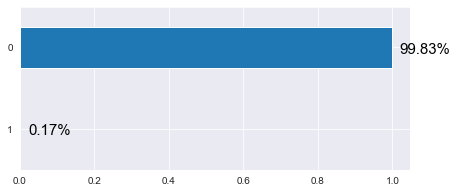

In [15]:
fig, ax = plt.subplots(figsize=(7,3))


ax = df_train["Class"].value_counts(normalize=True).sort_values().plot.barh()


# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width() + 0.02, i.get_y() + 0.18, str(round((i.get_width()/total)*100, 2))+'%', fontsize=15, color='black')


Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

# Multivariate

In [16]:
corr = df_train.corr()

In [17]:
mask = np.triu(corr)

<AxesSubplot:>

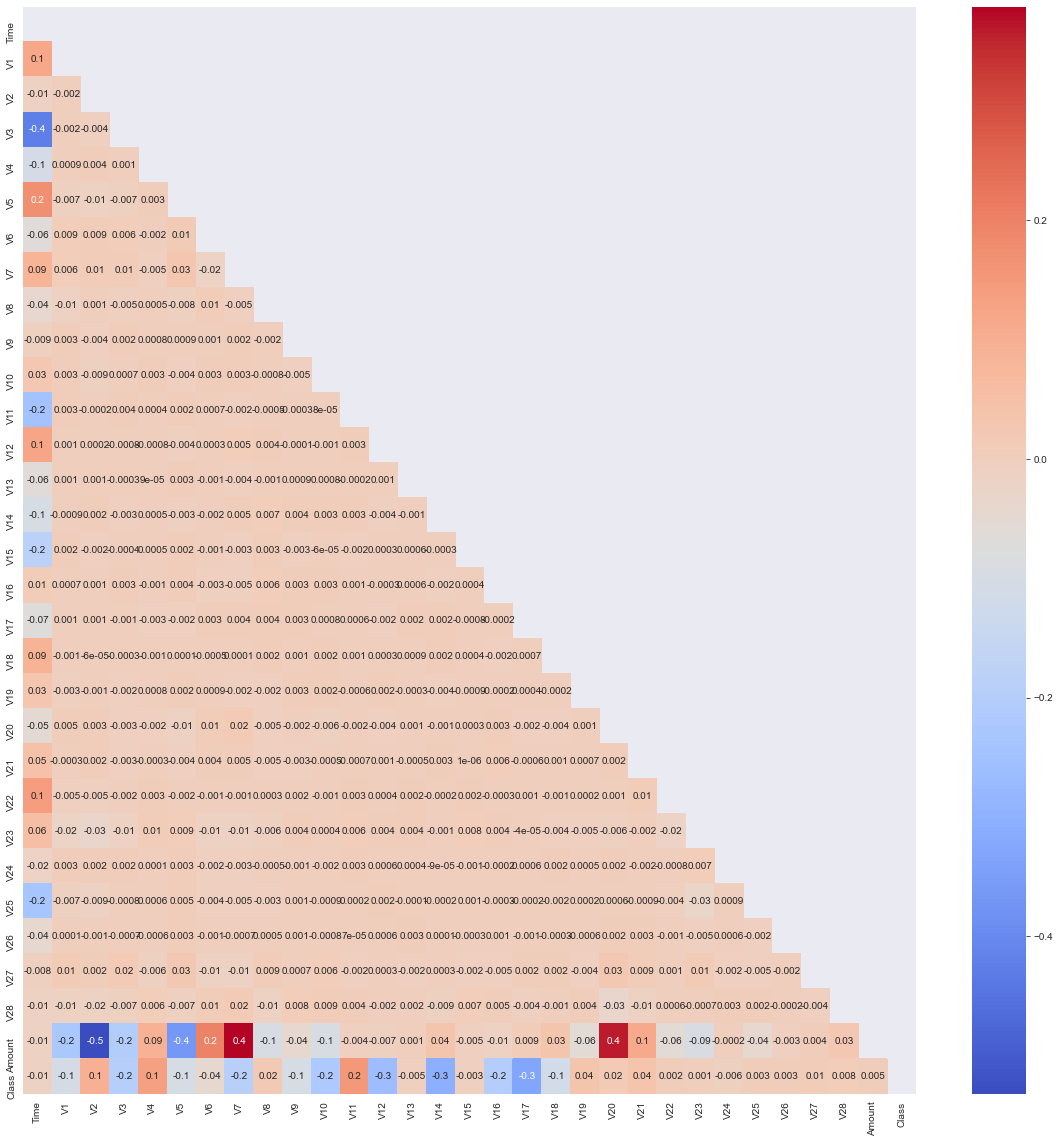

In [18]:
fig, ax = plt.subplots(figsize=(20,20))


sns.heatmap(corr, annot=True, fmt=".1g", cmap="coolwarm", mask = mask)

In [19]:
new_df_train = df_train.drop(["Amount", "Time"], axis=1)

In [20]:
new_corr = new_df_train.corr()

new_mask = np.triu(new_corr)

<AxesSubplot:>

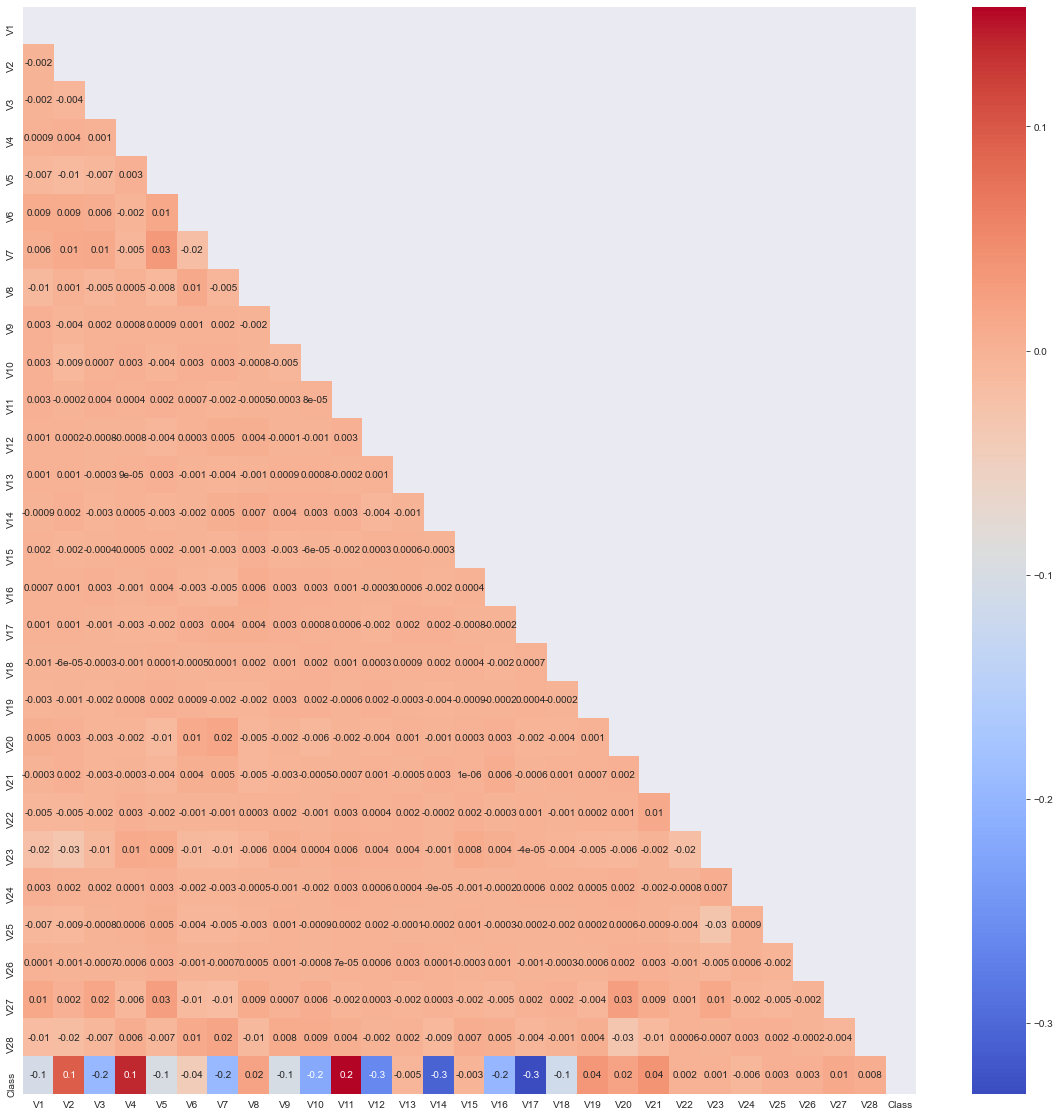

In [21]:
fig, ax = plt.subplots(figsize=(20,20))


sns.heatmap(new_corr, annot=True, fmt=".1g", cmap="coolwarm", mask = new_mask)

In [22]:
most_relevant_features = new_corr[np.abs(new_corr["Class"]) >= 0.1]["Class"].index

In [23]:
new_df_train = new_df_train[most_relevant_features]

In [24]:
new_df_train

,V1,V3,V4,V5,V7,V9,V10,V11,V12,V14,V16,V17,V18,Class
212072,1.518438,-3.093086,-0.388660,0.164518,0.859728,-1.287091,1.059841,0.160120,-0.243862,1.146851,-1.858838,-0.145729,1.457679,0
7676,-2.372834,3.224686,3.758968,-0.483226,-1.719115,1.853864,0.467220,0.978996,-2.285457,0.731574,-0.624413,1.654810,0.788221,0
83150,1.259924,0.516221,0.620255,-0.469781,0.071091,0.025140,-0.069639,-0.192358,0.439239,0.213424,0.296300,-0.429983,-0.558768,0
125745,-0.432809,2.135267,1.571277,0.007931,-0.090015,0.597818,-0.578365,-1.667500,0.406568,-0.767383,-1.491651,0.969220,-0.874141,0
84402,-1.152360,1.395097,0.304623,1.032487,0.547830,-0.416573,-0.628372,0.534569,0.643442,0.215940,-0.260110,-0.337424,-0.188210,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197897,-0.285551,0.047882,-1.147044,0.918186,1.788123,0.109335,-0.581070,-1.596595,-0.425844,0.121554,-0.362785,-0.669010,-0.273191,0
205374,1.944019,-2.009664,0.014190,1.320142,-0.167021,0.265249,-0.340999,1.278062,0.893066,-0.594080,-0.201284,0.854066,-0.978159,0
201919,1.981711,-2.723937,-1.524191,-0.436564,0.214254,-2.261830,1.844664,0.351461,-0.759812,0.654573,-1.099412,0.492250,0.306093,0
119540,1.256740,0.316176,0.686512,-0.315431,0.127908,-0.058650,-0.300499,0.032143,0.554569,-0.408031,0.451774,-0.041742,-0.371533,0


<AxesSubplot:>

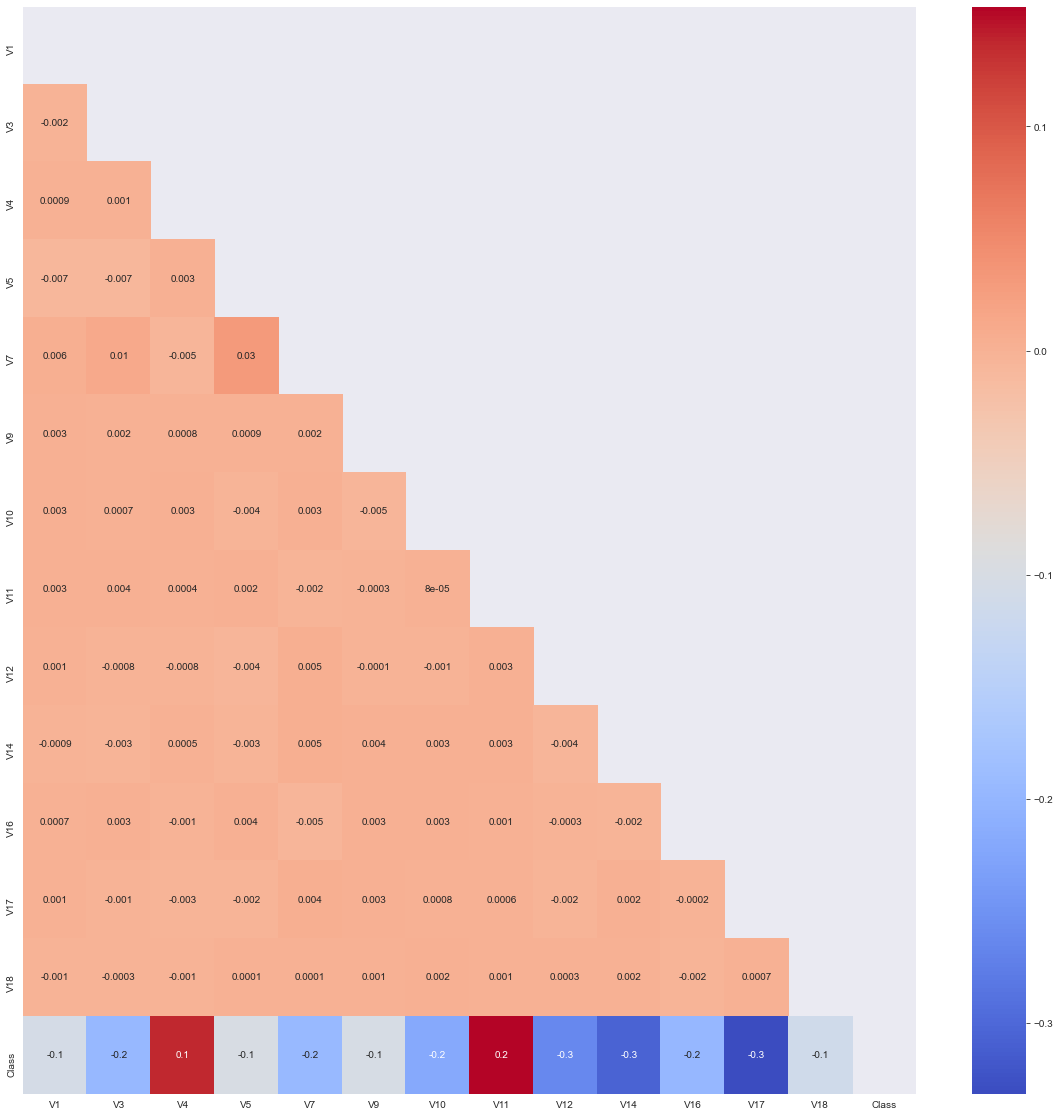

In [25]:
new_corr = new_df_train.corr()

new_mask = np.triu(new_corr)

fig, ax = plt.subplots(figsize=(20,20))


sns.heatmap(new_corr, annot=True, fmt=".1g", cmap="coolwarm", mask = new_mask)

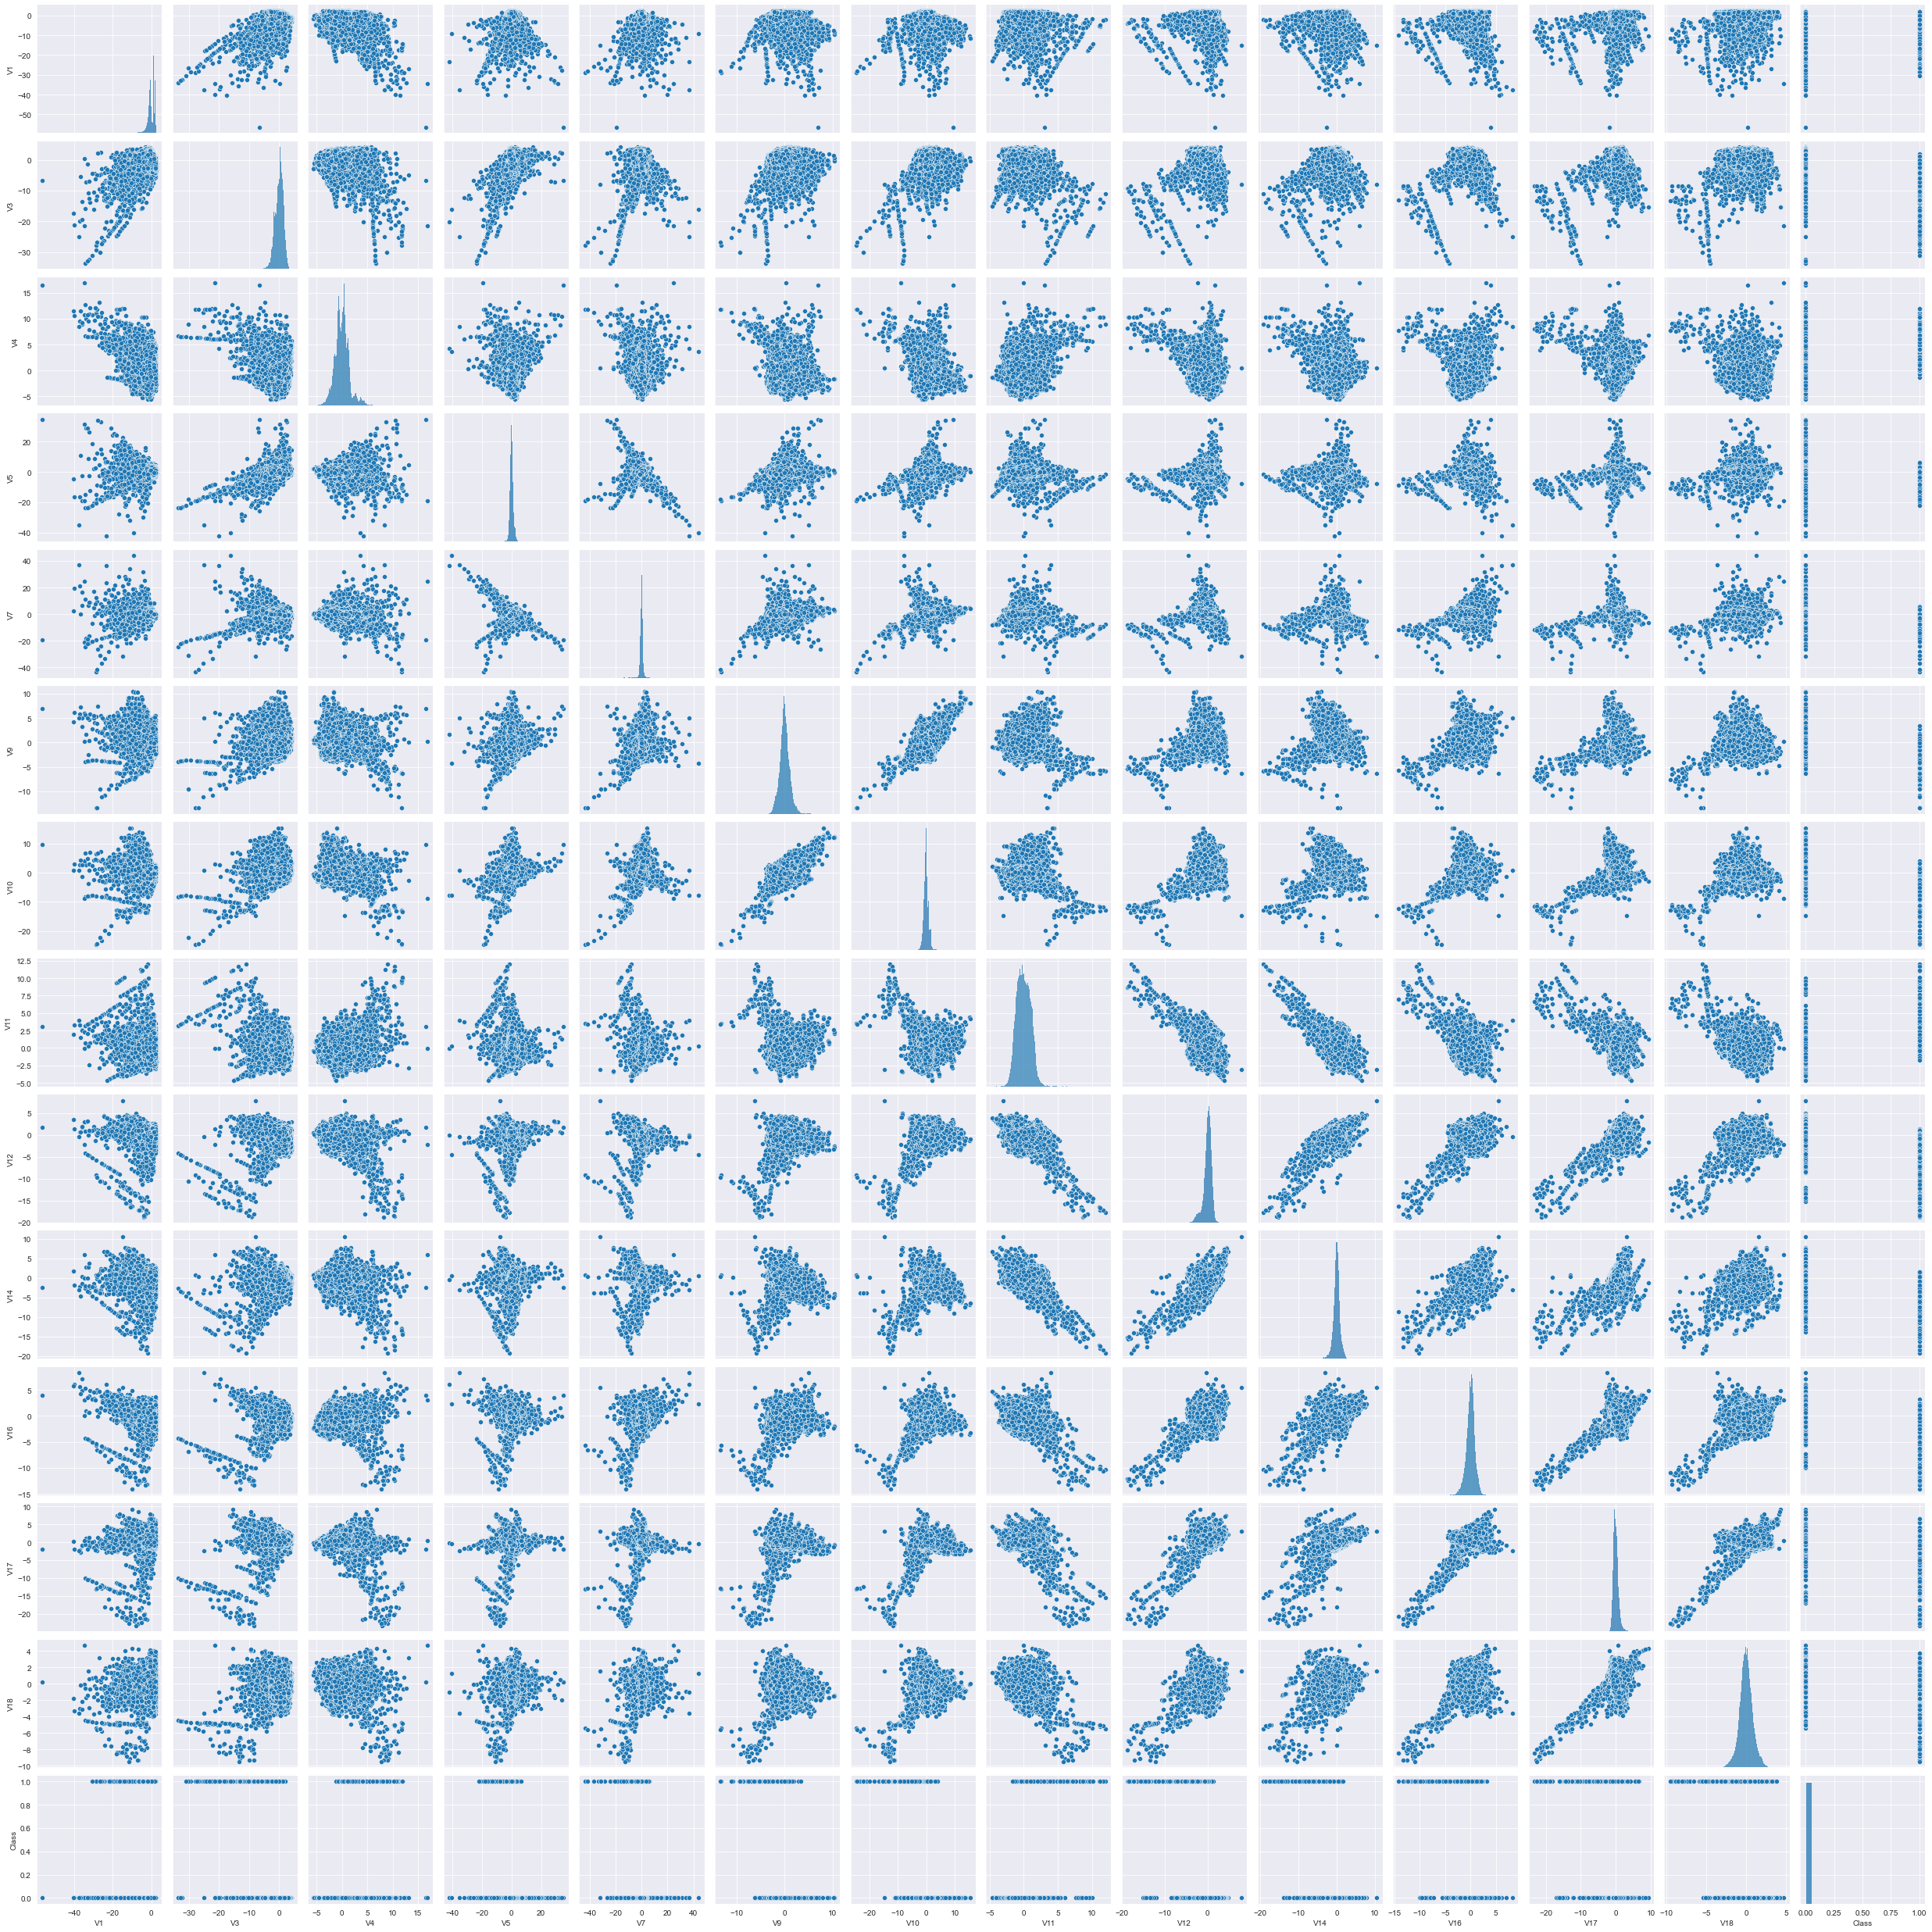

In [139]:
sns.pairplot(new_df_train)

# cleanning

In [26]:
new_df_train.isnull().any()

V1       False
V3       False
V4       False
V5       False
V7       False
V9       False
V10      False
V11      False
V12      False
V14      False
V16      False
V17      False
V18      False
Class    False
dtype: bool

In [27]:
print(f" original len: {len(new_df_train)} | dropping duplicates {len(new_df_train.drop_duplicates())} ")

 original len: 199365 | dropping duplicates 194170 


In [28]:
(199365 - 194179) / 199365

0.026012589973164798

In [29]:
new_df_train.drop_duplicates(inplace=True)

# checking assumptions

### v1

skewness -3.251736835651153
kurtosis 32.333235735558915


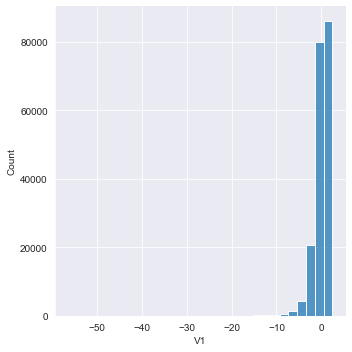

In [30]:
verifyKurtosisAndSkewness(new_df_train["V1"])

((array([-4.48948438, -4.29677438, -4.19216596, ...,  4.19216596,
          4.29677438,  4.48948438]),
  array([-56.40750963, -40.47014184, -40.0425375 , ...,   2.42250773,
           2.43050678,   2.44650498])),
 (1.7468633856796791, -0.026757904118541388, 0.8957054219566097))

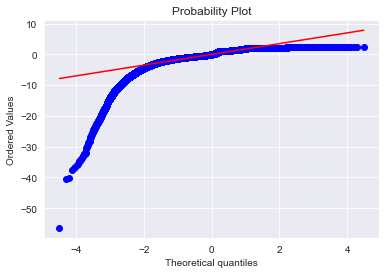

In [31]:
stats.probplot(new_df_train["V1"], dist="norm", plot=pylab)

### v3

skewness -2.082764596031952
kurtosis 21.930859497896645


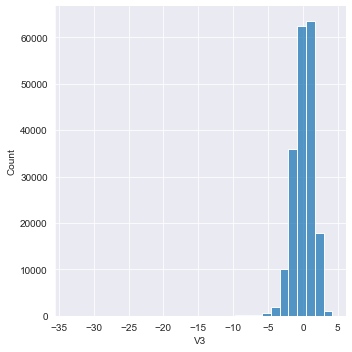

In [32]:
verifyKurtosisAndSkewness(new_df_train["V3"])

((array([-4.48948438, -4.29677438, -4.19216596, ...,  4.19216596,
          4.29677438,  4.48948438]),
  array([-33.68098402, -32.96534576, -32.45419819, ...,   4.07916781,
           4.1878106 ,   4.22610848])),
 (1.4339041280383007, 0.021465067397888473, 0.9549473562169474))

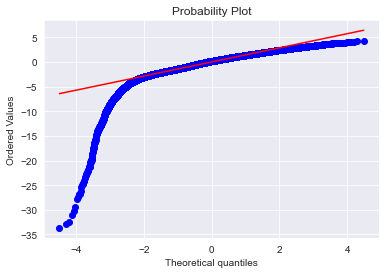

In [33]:
stats.probplot(new_df_train["V3"], dist="norm", plot=pylab)

### v4

skewness 0.6727154937986184
kurtosis 2.514589845660794


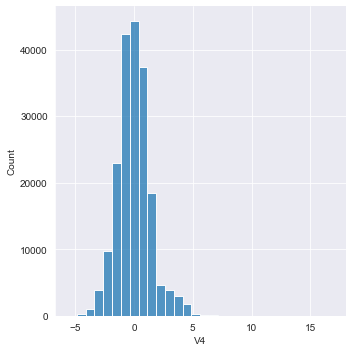

In [34]:
verifyKurtosisAndSkewness(new_df_train["V4"])

((array([-4.48948438, -4.29677438, -4.19216596, ...,  4.19216596,
          4.29677438,  4.48948438]),
  array([-5.60060714, -5.56011758, -5.51969712, ..., 13.1436681 ,
         16.49121717, 16.87534403])),
 (1.3991797982607983, -0.004264814173504104, 0.9847626276360301))

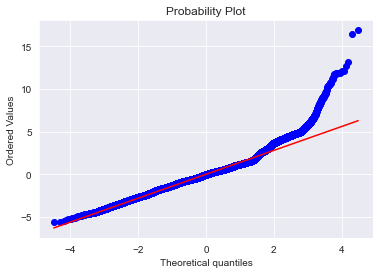

In [35]:
stats.probplot(new_df_train["V4"], dist="norm", plot=pylab)

### v5

skewness -0.3598183635310121
kurtosis 52.884696295171175


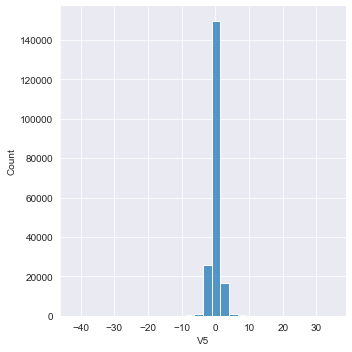

In [36]:
verifyKurtosisAndSkewness(new_df_train["V5"])

((array([-4.48948438, -4.29677438, -4.19216596, ...,  4.19216596,
          4.29677438,  4.48948438]),
  array([-42.14789837, -40.4277263 , -35.18212031, ...,  32.9114617 ,
          34.09930934,  34.80166588])),
 (1.2460333628406781, -0.008935986474370371, 0.9144412963562016))

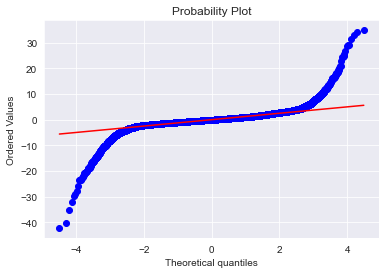

In [37]:
stats.probplot(new_df_train["V5"], dist="norm", plot=pylab)

### v7

skewness -0.474055187066289
kurtosis 100.8532713456624


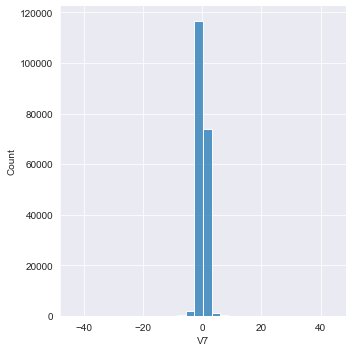

In [38]:
verifyKurtosisAndSkewness(new_df_train["V7"])

((array([-4.48948438, -4.29677438, -4.19216596, ...,  4.19216596,
          4.29677438,  4.48948438]),
  array([-43.55724157, -41.50679608, -37.06031146, ...,  36.67726795,
          36.87736827,  44.05446136])),
 (1.0512914126118447, 0.006205172408422602, 0.86790736520538))

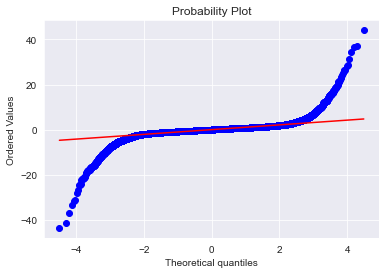

In [39]:
stats.probplot(new_df_train["V7"], dist="norm", plot=pylab)

### v9

skewness 0.5302164485270078
kurtosis 3.5336283426316895


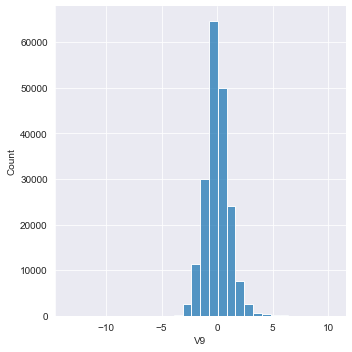

In [40]:
verifyKurtosisAndSkewness(new_df_train["V9"])

((array([-4.48948438, -4.29677438, -4.19216596, ...,  4.19216596,
          4.29677438,  4.48948438]),
  array([-13.43406632, -13.32015469, -11.12662352, ...,  10.3484067 ,
          10.37065798,  10.39288882])),
 (1.0815981906749559, -0.009414634970272135, 0.9851979635232938))

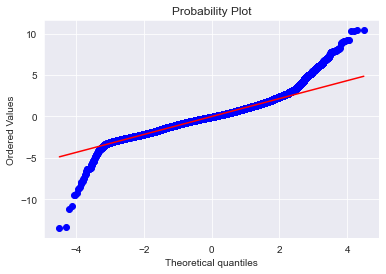

In [41]:
stats.probplot(new_df_train["V9"], dist="norm", plot=pylab)

### v10

skewness 1.1599276139697479
kurtosis 29.77353743808849


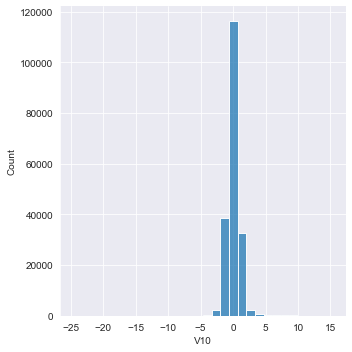

In [42]:
verifyKurtosisAndSkewness(new_df_train["V10"])

((array([-4.48948438, -4.29677438, -4.19216596, ...,  4.19216596,
          4.29677438,  4.48948438]),
  array([-24.58826244, -24.40318497, -23.22825484, ...,  13.81175777,
          15.2360282 ,  15.33174156])),
 (0.9808250558663866, 0.001471540077347083, 0.907642187937305))

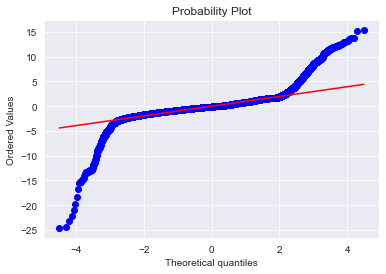

In [43]:
stats.probplot(new_df_train["V10"], dist="norm", plot=pylab)

### v11

skewness 0.32560717867048533
kurtosis 1.4009646327280887


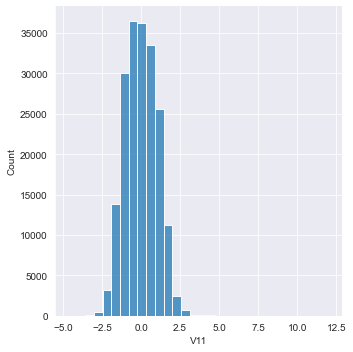

In [44]:
verifyKurtosisAndSkewness(new_df_train["V11"])

((array([-4.48948438, -4.29677438, -4.19216596, ...,  4.19216596,
          4.29677438,  4.48948438]),
  array([-4.68293055, -4.56839025, -4.45385284, ..., 11.22847028,
         11.66920474, 12.01891318])),
 (1.0130112856576188, -0.007066974559354005, 0.9931236976462784))

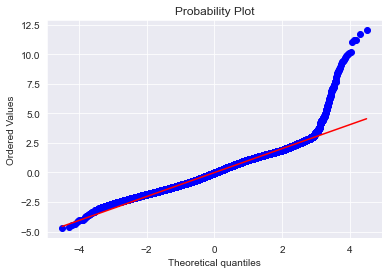

In [45]:
stats.probplot(new_df_train["V11"], dist="norm", plot=pylab)

### v12

skewness -2.195558017497079
kurtosis 18.931991902066216


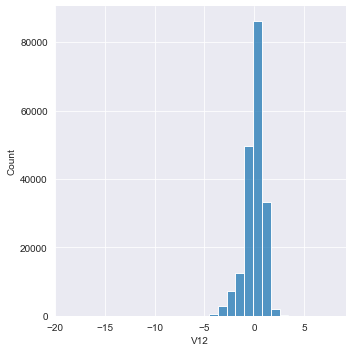

In [46]:
verifyKurtosisAndSkewness(new_df_train["V12"])

((array([-4.48948438, -4.29677438, -4.19216596, ...,  4.19216596,
          4.29677438,  4.48948438]),
  array([-18.68371463, -18.55369701, -18.43113103, ...,   4.47292058,
           4.84645241,   7.84839208])),
 (0.9403238660197419, -0.005379387527337543, 0.9416757294903157))

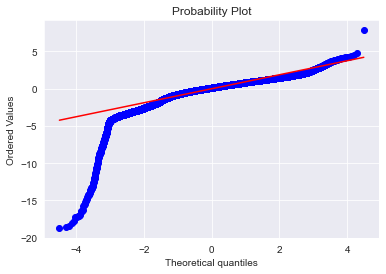

In [47]:
stats.probplot(new_df_train["V12"], dist="norm", plot=pylab)

### v14

skewness -1.9448368938603355
kurtosis 23.623805258645028


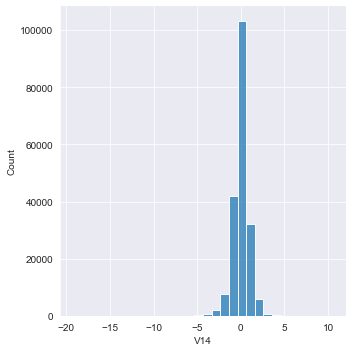

In [48]:
verifyKurtosisAndSkewness(new_df_train["V14"])

((array([-4.48948438, -4.29677438, -4.19216596, ...,  4.19216596,
          4.29677438,  4.48948438]),
  array([-19.21432549, -18.49377336, -18.04999769, ...,   7.69220854,
           7.75459875,  10.52676605])),
 (0.8962959075185993, 0.0021160305902051396, 0.9422749970311852))

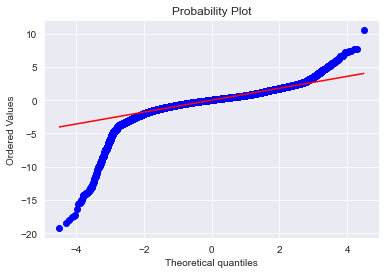

In [49]:
stats.probplot(new_df_train["V14"], dist="norm", plot=pylab)

### v16

skewness -1.0814830778567783
kurtosis 9.428125364540572


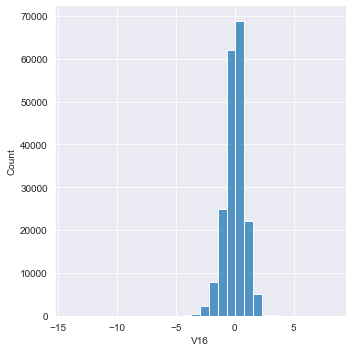

In [50]:
verifyKurtosisAndSkewness(new_df_train["V16"])

((array([-4.48948438, -4.29677438, -4.19216596, ...,  4.19216596,
          4.29677438,  4.48948438]),
  array([-14.12985452, -13.30388758, -13.25683309, ...,   6.09852945,
           7.05913181,   8.28988956])),
 (0.8582161726232559, -0.00338247644608343, 0.9765273485744697))

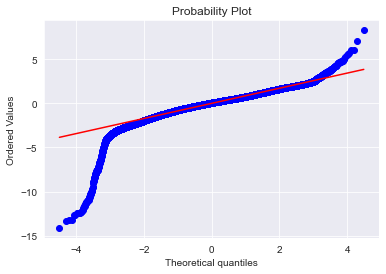

In [51]:
stats.probplot(new_df_train["V16"], dist="norm", plot=pylab)

### v17

skewness -3.861231152440403
kurtosis 96.49841757154645


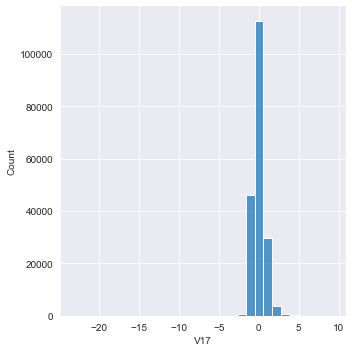

In [52]:
verifyKurtosisAndSkewness(new_df_train["V17"])

((array([-4.48948438, -4.29677438, -4.19216596, ...,  4.19216596,
          4.29677438,  4.48948438]),
  array([-23.24159715, -22.88399858, -22.66790541, ...,   7.89339253,
           8.53819514,   9.25352625])),
 (0.7519913169868294, 0.0002379956357244191, 0.8910513315068167))

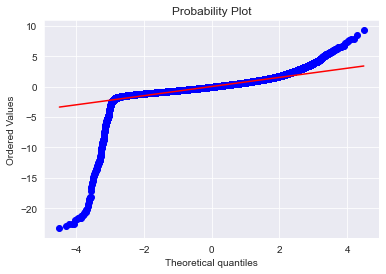

In [53]:
stats.probplot(new_df_train["V17"], dist="norm", plot=pylab)

### v18

skewness -0.474055187066289
kurtosis 100.8532713456624


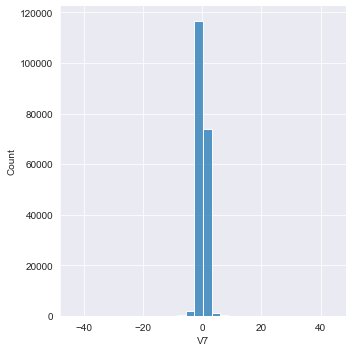

In [54]:
verifyKurtosisAndSkewness(new_df_train["V7"])

((array([-4.48948438, -4.29677438, -4.19216596, ...,  4.19216596,
          4.29677438,  4.48948438]),
  array([-43.55724157, -41.50679608, -37.06031146, ...,  36.67726795,
          36.87736827,  44.05446136])),
 (1.0512914126118447, 0.006205172408422602, 0.86790736520538))

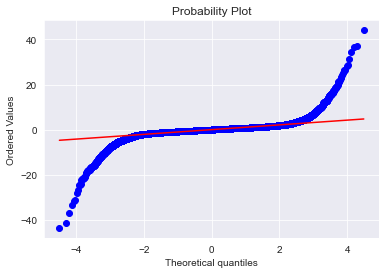

In [55]:
stats.probplot(new_df_train["V7"], dist="norm", plot=pylab)

## standardizing data

In [57]:
y = new_df_train.iloc[:,-1]
X = new_df_train.iloc[:,:-1]

In [82]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=22)

In [83]:
std = preprocessing.StandardScaler()

In [84]:
X_train = std.fit_transform(X_train)

In [85]:
X_val = std.transform(X_val)

In [87]:
svc = SVC()

In [88]:
svc.fit(X_train, y_train)

SVC()

In [89]:
y_pred = svc.predict(X_val)

In [92]:
roc_auc_score(y_val, y_pred)

0.7897211330100092

In [93]:
rfc = RandomForestClassifier()

In [94]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [96]:
y_pred = rfc.predict(X_val)

In [97]:
roc_auc_score(y_val, y_pred)

0.8635434939634713